In [2]:
from google.colab import files
uploaded = files.upload()


Saving Chernobyl_ Chemical_Radiation (1).csv to Chernobyl_ Chemical_Radiation (1).csv


In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats
import matplotlib.pyplot as plt
#%matplotlib inline
import io
import os
import datetime
from datetime import date
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
df2 = pd.read_csv(io.BytesIO(uploaded['Chernobyl_ Chemical_Radiation (1).csv']))
data = pd.read_csv("Chernobyl_ Chemical_Radiation (1).csv")




In [22]:
data0=pd.read_csv('Chernobyl_ Chemical_Radiation (1).csv')
data0

,PAYS,Code,Location,Longitude,Latitude,Date,I_131_(Bq/m3),Cs_134_(Bq/m3),Cs_137_(Bq/m3)
0,SE,1,RISOE,12.07,55.7,86/04/27,1,0,0.24
1,SE,1,RISOE,12.07,55.7,86/04/28,0.0046,0.00054,0.00098
2,SE,1,RISOE,12.07,55.7,86/04/29,0.0147,0.0043,0.0074
3,SE,1,RISOE,12.07,55.7,86/04/29,0.00061,0,0.00009
4,SE,1,RISOE,12.07,55.7,86/04/30,0.00075,0.0001,0.00028
...,...,...,...,...,...,...,...,...,...
2046,HU,24,BUDAPEST,19.10,47.5,86/05/07,3.7,0.58,1.2
2047,HU,24,BUDAPEST,19.10,47.5,86/05/08,2.2,0.33,0.69
2048,HU,24,BUDAPEST,19.10,47.5,86/05/09,0.75,0.14,0.29
2049,HU,24,BUDAPEST,19.10,47.5,86/05/10,0.054,0.006,0.009


In [24]:
date2=[]
for item in data0['Date']:
    item2=item.replace('/','-')
    date2+=[date.fromisoformat('19'+str(item2))]
data0['Date']=date2

In [25]:
print(data0.columns.tolist())

['PAYS', 'Code', 'Location', 'Longitude', 'Latitude', 'Date', 'I_131_(Bq/m3)', 'Cs_134_(Bq/m3)', 'Cs_137_(Bq/m3)']


In [26]:
data0=data0.fillna(0).replace('<',0).replace('L',0).replace('N',0)

In [27]:
data0['I_131_(Bq/m3)']=data0['I_131_(Bq/m3)'].astype(float)
data0['Cs_134_(Bq/m3)']=data0['Cs_134_(Bq/m3)'].astype(float)
data0['Cs_137_(Bq/m3)']=data0['Cs_137_(Bq/m3)'].astype(float)

In [28]:
data1=data0[['Location', 'Longitude', 'Latitude']]
data2=data1.drop_duplicates().reset_index(drop=True)
data2

,Location,Longitude,Latitude
0,RISOE,12.07,55.70
1,AACHEN(DWD),6.10,50.76
2,AACHEN(RWTH),6.10,50.76
3,ANSBACH,10.59,49.30
4,BERLIN-WEST,13.42,52.50
...,...,...,...
92,MORAVSKY,49.08,16.33
93,PRAHA,50.08,14.42
94,PRAHA,50.00,14.42
95,USTI,50.68,14.00


In [29]:
glasgow=data2[data2['Location']=='GLASGOW']
oslo=data2[data2['Location']=='OSLO']
paris=data2[data2['Location']=='PARIS']
berlinwest=data2[data2['Location']=='BERLIN-WEST']
cities=pd.concat([glasgow,oslo])
cities=pd.concat([cities,paris])
cities=pd.concat([cities,berlinwest])
cities=cities.reset_index(drop=True)
cities

,Location,Longitude,Latitude
0,GLASGOW,-4.49,56.00
1,GLASGOW,-4.83,56.00
2,OSLO,9.80,59.90
3,PARIS,2.36,48.85
4,BERLIN-WEST,13.42,52.50


In [30]:
data0_c1=data0[data0['Location']=='GLASGOW'].groupby('Date',as_index=False).max()
data0_c2=data0[data0['Location']=='OSLO'].groupby('Date',as_index=False).max()
data0_c3=data0[data0['Location']=='PARIS'].groupby('Date',as_index=False).max()
data0_c4=data0[data0['Location']=='BERLIN-WEST'].groupby('Date',as_index=False).max()

In [31]:
fig=make_subplots(specs=[[{"secondary_y":False}]])
fig.add_trace(go.Scatter(x=data0_c1['Date'],y=data0_c1['I_131_(Bq/m3)'],name='GLASGOW'),secondary_y=False,)
fig.add_trace(go.Scatter(x=data0_c2['Date'],y=data0_c2['I_131_(Bq/m3)'],name='OSLO'),secondary_y=False,)
fig.add_trace(go.Scatter(x=data0_c3['Date'],y=data0_c3['I_131_(Bq/m3)'],name='PARIS'),secondary_y=False,)
fig.add_trace(go.Scatter(x=data0_c4['Date'],y=data0_c4['I_131_(Bq/m3)'],name='BERLIN-WEST'),secondary_y=False,)
fig.update_layout(autosize=False,width=700,height=500,title_text='I_131 in GLASGOW, OSLO, PARIS and BERLIN-WEST')
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Bq/m3",secondary_y=False)
fig.show()

In [32]:
fig=make_subplots(specs=[[{"secondary_y":False}]])
fig.add_trace(go.Scatter(x=data0_c1['Date'],y=data0_c1['Cs_134_(Bq/m3)'],name='GLASGOW'),secondary_y=False,)
fig.add_trace(go.Scatter(x=data0_c2['Date'],y=data0_c2['Cs_134_(Bq/m3)'],name='OSLO'),secondary_y=False,)
fig.add_trace(go.Scatter(x=data0_c3['Date'],y=data0_c3['Cs_134_(Bq/m3)'],name='PARIS'),secondary_y=False,)
fig.add_trace(go.Scatter(x=data0_c4['Date'],y=data0_c4['Cs_134_(Bq/m3)'],name='BERLIN-WEST'),secondary_y=False,)
fig.update_layout(autosize=False,width=700,height=500,title_text='Cs_134 in GLASGOW, OSLO, PARIS and BERLIN-WEST')
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Bq/m3",secondary_y=False)
fig.show()


In [37]:
fig=make_subplots(specs=[[{"secondary_y":False}]])
fig.add_trace(go.Scatter(x=data0_c1['Date'],y=data0_c1['Cs_137_(Bq/m3)'],name='GLASGOW'),secondary_y=False,)
fig.add_trace(go.Scatter(x=data0_c2['Date'],y=data0_c2['Cs_137_(Bq/m3)'],name='OSLO'),secondary_y=False,)
fig.add_trace(go.Scatter(x=data0_c3['Date'],y=data0_c3['Cs_137_(Bq/m3)'],name='PARIS'),secondary_y=False,)
fig.add_trace(go.Scatter(x=data0_c4['Date'],y=data0_c4['Cs_137_(Bq/m3)'],name='BERLIN-WEST'),secondary_y=False,)
fig.update_layout(autosize=False,width=700,height=500,title_text='Cs_137 in GLASGOW, OSLO, PARIS and BERLIN-WEST')
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Bq/m3",secondary_y=False)
fig.show()

In [55]:
import folium
def visualize_map(df,zoom):
    lat_map = 50.0
    lon_map = 10.0
    f = folium.Figure(width=800,height=400)
    m = folium.Map([lat_map,lon_map],zoom_start=zoom).add_to(f)
    for i in range(0,len(df)):
        folium.Marker(popup=df['Location'][i],location=[df['Latitude'][i],df['Longitude'][i]],icon=folium.Icon(icon_color='Red', icon='fire', prefix='fa')).add_to(m)                              
    return m

In [57]:
visualize_map(cities,4)

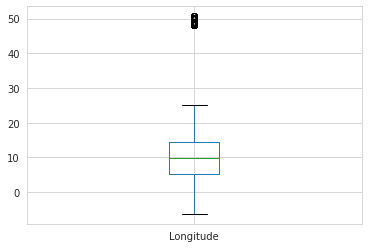

In [42]:
data.boxplot('Longitude')

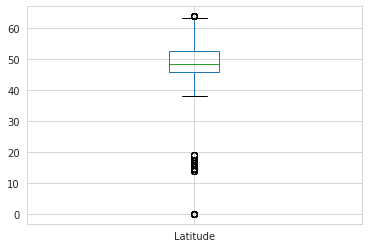

In [43]:
Sdata.boxplot('Latitude')